### Post modeling EDA

In [1]:
#Import relevant packages
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the saved 'estimated' file which is a dataframe containing predicted movie ratings
est = pd.read_csv('estimated')
est.head(2)

,Unnamed: 0,userId,movieId,estimatedrating
0,0,1,1,4.546813
1,1,1,3,3.762028


In [3]:
est.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228361 entries, 0 to 228360
Data columns (total 3 columns):
userId             228361 non-null int64
movieId            228361 non-null int64
estimatedrating    228361 non-null float64
dtypes: float64(1), int64(2)
memory usage: 5.2 MB


In [5]:
est.isna().sum()

userId             0
movieId            0
estimatedrating    0
dtype: int64

In [6]:
est.nunique()

userId                133
movieId              1717
estimatedrating    228116
dtype: int64

In [7]:
act = pd.read_csv('cleaneddata')
act.head(2)

,Unnamed: 0,userId,movieId,rating,title,genres,year
0,0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995


In [8]:
act.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100819 entries, 0 to 100818
Data columns (total 6 columns):
userId     100819 non-null int64
movieId    100819 non-null int64
rating     100819 non-null float64
title      100819 non-null object
genres     100819 non-null object
year       100819 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [10]:
act.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [11]:
act.nunique()

userId      610
movieId    9712
rating       10
title      9707
genres      951
year        107
dtype: int64

First want to look at EDA differences between the actual user ratings vs the model predicted ratings.

In [12]:
df_inner = act.merge(est, how='inner')

In [13]:
df_inner

,userId,movieId,rating,title,genres,year,estimatedrating
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.546813
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,3.762028
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995,4.449869
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995,4.872889
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995,4.916431
...,...,...,...,...,...,...,...
47227,610,152081,4.0,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,2016,3.854231
47228,610,158238,5.0,The Nice Guys (2016),Crime|Mystery|Thriller,2016,4.215047
47229,610,164179,5.0,Arrival (2016),Sci-Fi,2016,4.311976
47230,610,166528,4.0,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,2016,4.129635


In [14]:
df_inner.groupby('title').mean()['estimatedrating'].sort_values(ascending=False)

title
Paths of Glory (1957)                         4.580851
Double Indemnity (1944)                       4.494700
Streetcar Named Desire, A (1951)              4.464226
Godfather, The (1972)                         4.435731
Shawshank Redemption, The (1994)              4.428749
                                                ...   
Problem Child (1990)                          1.883254
Scary Movie 3 (2003)                          1.827069
Flintstones in Viva Rock Vegas, The (2000)    1.816217
Superman IV: The Quest for Peace (1987)       1.794489
Speed 2: Cruise Control (1997)                1.716490
Name: estimatedrating, Length: 1717, dtype: float64

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


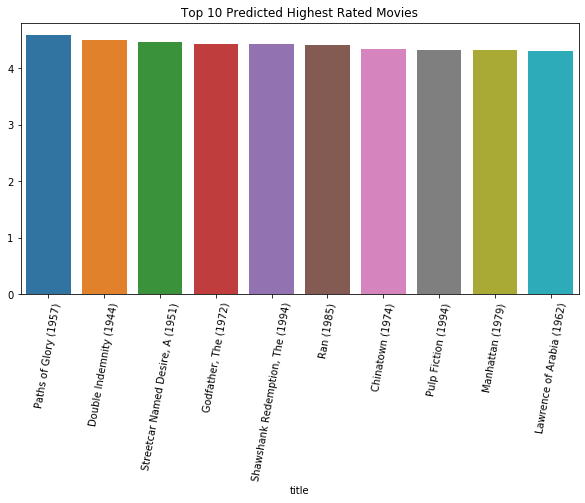

In [15]:
#Plot the top 10 predicted highest rated movies
plt.figure(figsize=(10,5))
topmovies = df_inner.groupby('title').mean()['estimatedrating'].sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 Predicted Highest Rated Movies')
plt.xticks(rotation=80);

In terms of unpersonalized recommendations, we can suggest the top 10 highest rated movies based on model predictions

In [17]:
#Plot a histogram of the frequency of certain estimated rating values
plt.hist(df_inner['estimatedrating'],bins=30, range(6000))
plt.hist(df_inner['rating'],bins=30, range(6000))
plt.xlabel('Value of Estimated rating')
plt.ylabel('Frequency of Estimated ratings')
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-17-bd4845d35184>, line 2)

Similar to the actual ratings, in that the peak frequency was about 4 as well and less values at the lower end
(1, 2) etc.

In [17]:
df_inner.groupby('title').size().sort_values(ascending=False)

title
Forrest Gump (1994)                                                   119
Matrix, The (1999)                                                    113
Star Wars: Episode IV - A New Hope (1977)                             111
Star Wars: Episode V - The Empire Strikes Back (1980)                 107
Pulp Fiction (1994)                                                   105
                                                                     ... 
Around the World in 80 Days (1956)                                     11
Englishman Who Went Up a Hill But Came Down a Mountain, The (1995)     11
Enter the Dragon (1973)                                                11
Purple Rose of Cairo, The (1985)                                       11
Fantastic Beasts and Where to Find Them (2016)                         11
Length: 1717, dtype: int64

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


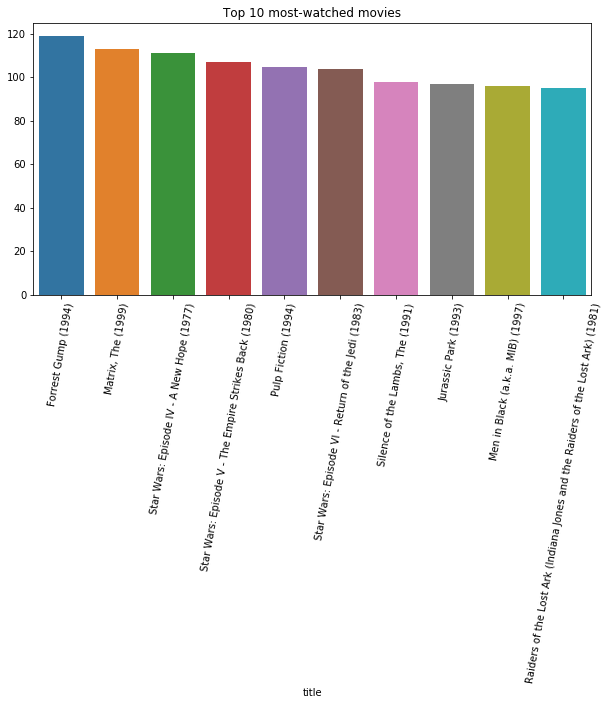

In [18]:
#Plot the top 10 most watched movies
plt.figure(figsize=(10,5))
topmovies = df_inner.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched movies')
plt.xticks(rotation=80);

In [19]:
df_left = act.merge(est, how='outer')

In [20]:
df_left.isna().sum()

userId                  0
movieId                 0
rating             181129
title              181129
genres             181129
year               181129
estimatedrating     53587
dtype: int64

In [21]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281948 entries, 0 to 281947
Data columns (total 7 columns):
userId             281948 non-null int64
movieId            281948 non-null int64
rating             100819 non-null float64
title              100819 non-null object
genres             100819 non-null object
year               100819 non-null object
estimatedrating    228361 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.2+ MB


In [25]:
df_inner['rating']

0        4.0
1        4.0
2        4.0
3        5.0
4        5.0
        ... 
47227    4.0
47228    5.0
47229    5.0
47230    4.0
47231    5.0
Name: rating, Length: 47232, dtype: float64

In [24]:
df_inner['estimatedrating']

0        4.546813
1        3.762028
2        4.449869
3        4.872889
4        4.916431
           ...   
47227    3.854231
47228    4.215047
47229    4.311976
47230    4.129635
47231    4.487344
Name: estimatedrating, Length: 47232, dtype: float64

In [18]:
df_inner.head(2)

,userId,movieId,rating,title,genres,year,estimatedrating
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.546813
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,3.762028


In [19]:
#Create genre labels
genrelabels = set()
for i in df_inner['genres'].str.split('|').values:
    genrelabels = genrelabels.union(set(i))

In [20]:
genrelabels

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [21]:
#Create columns for each genre to indicate T/F
for genre in genrelabels:
    df_inner[genre] = df_inner['genres'].apply(lambda x: genre in x)

In [28]:
pd.set_option('max_columns', None)
df_inner.head(2)

,userId,movieId,rating,title,genres,year,estimatedrating,Crime,Fantasy,Thriller,Drama,IMAX,Adventure,War,Sci-Fi,Mystery,Romance,Animation,Documentary,Musical,Comedy,Action,Horror,Film-Noir,Western,Children
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.546813,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,3.762028,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False


In [29]:
matrix = df_inner.drop(['userId', 'movieId', 'estimatedrating', 'genres', 'year'], axis=1)
matrix.head(2)

,rating,title,Crime,Fantasy,Thriller,Drama,IMAX,Adventure,War,Sci-Fi,Mystery,Romance,Animation,Documentary,Musical,Comedy,Action,Horror,Film-Noir,Western,Children
0,4.0,Toy Story (1995),False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True
1,4.0,Grumpier Old Men (1995),False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False


Looking at the 10 highest ratings for each movie in every genre.

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

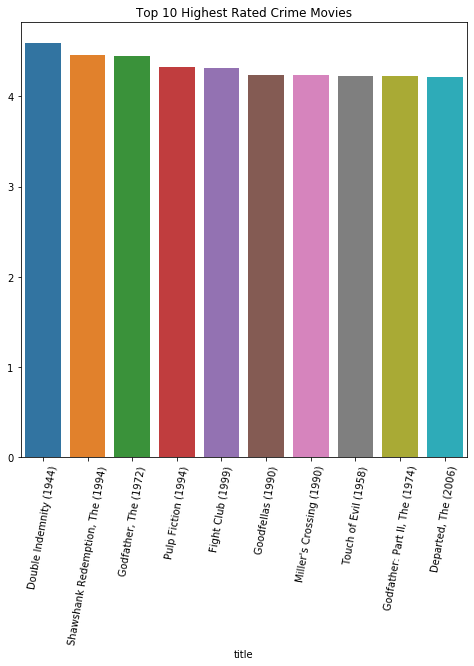

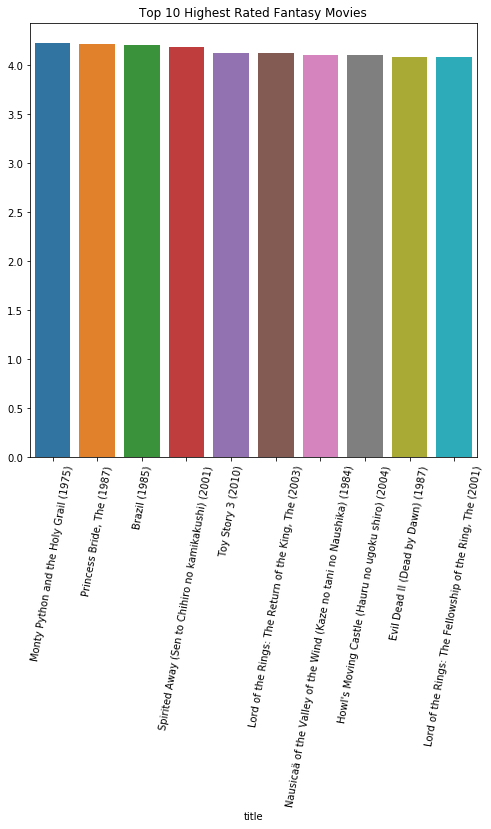

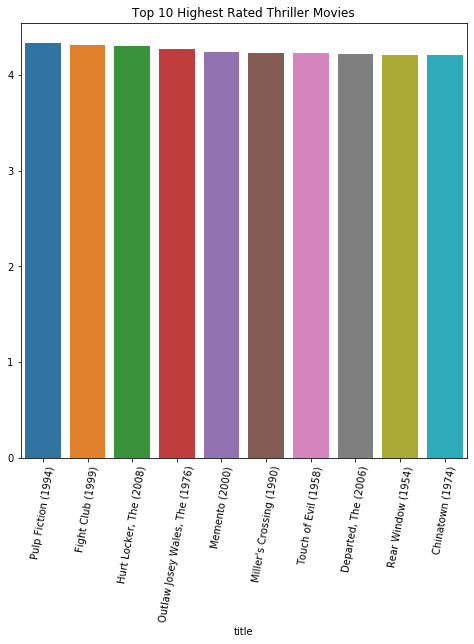

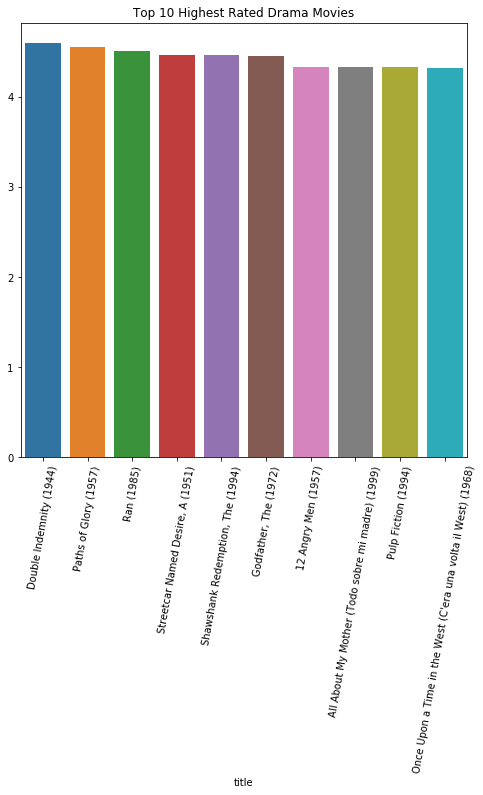

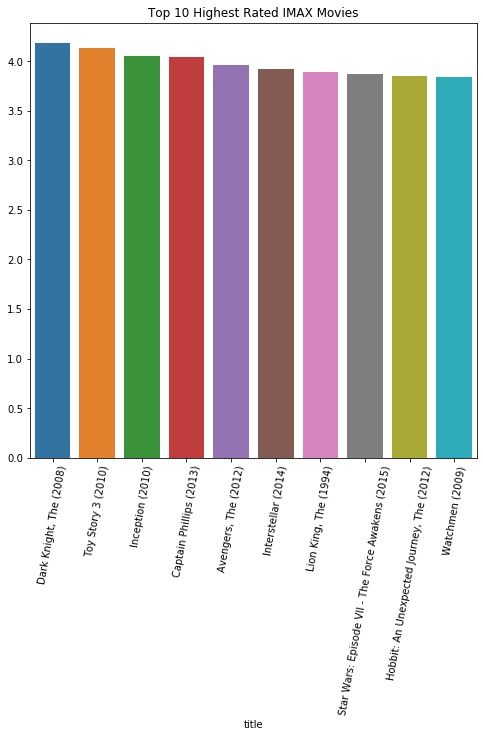

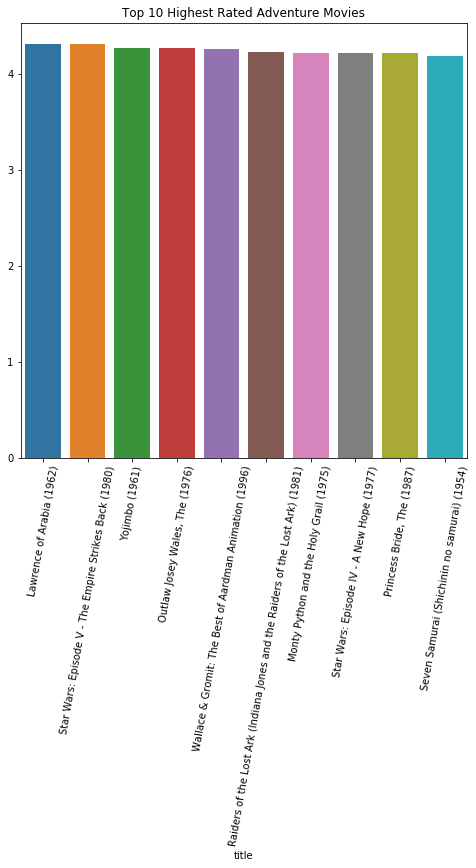

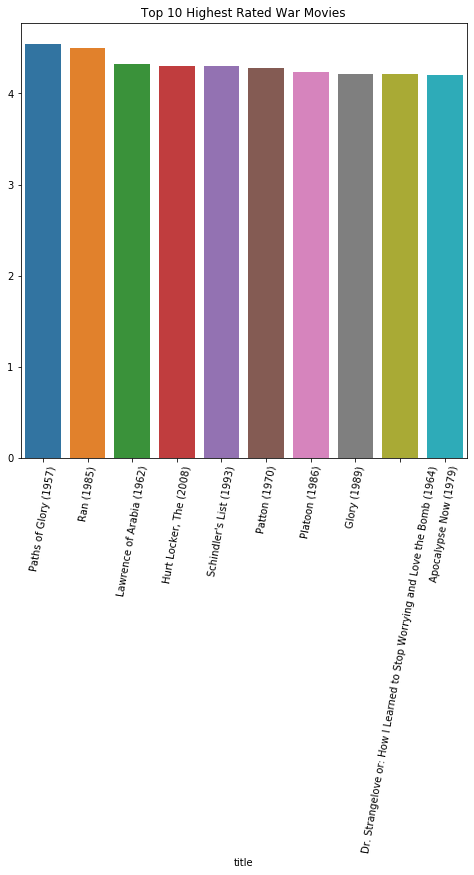

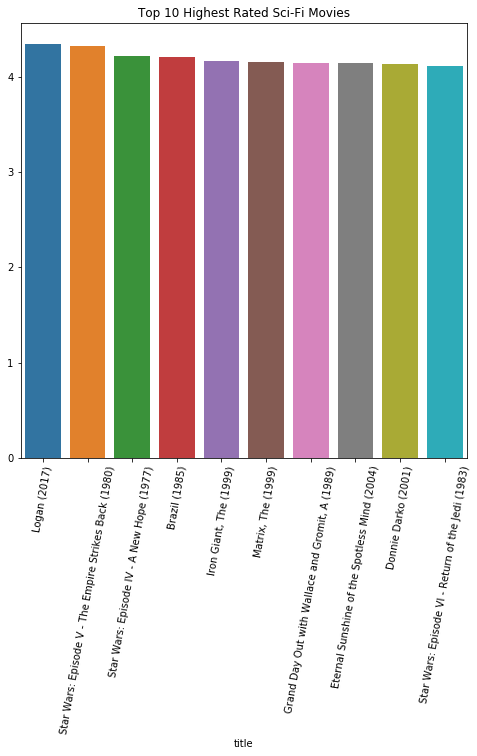

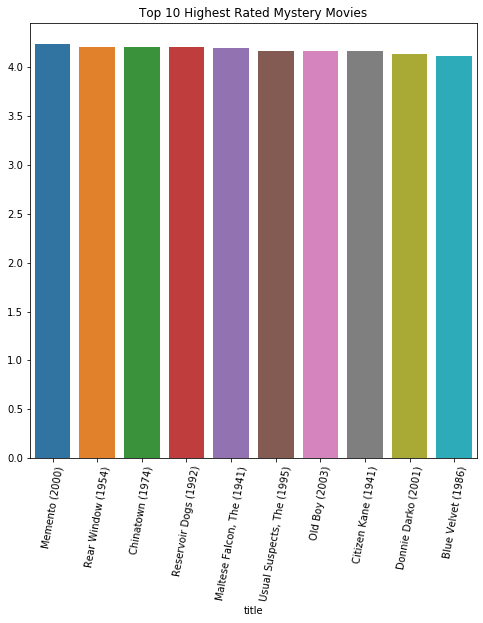

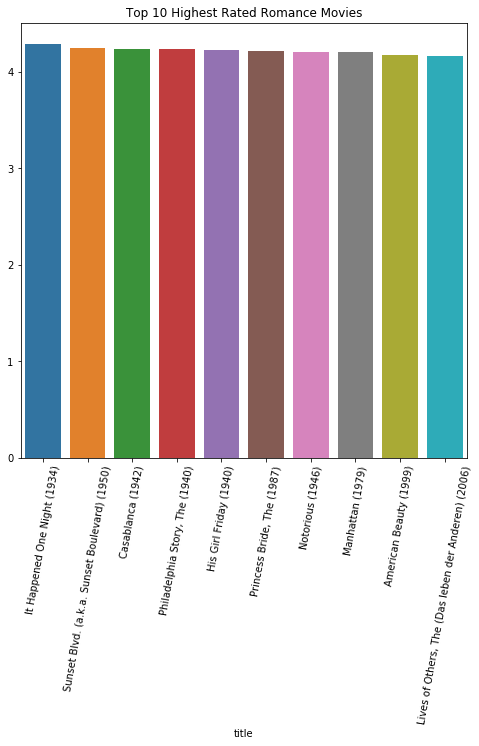

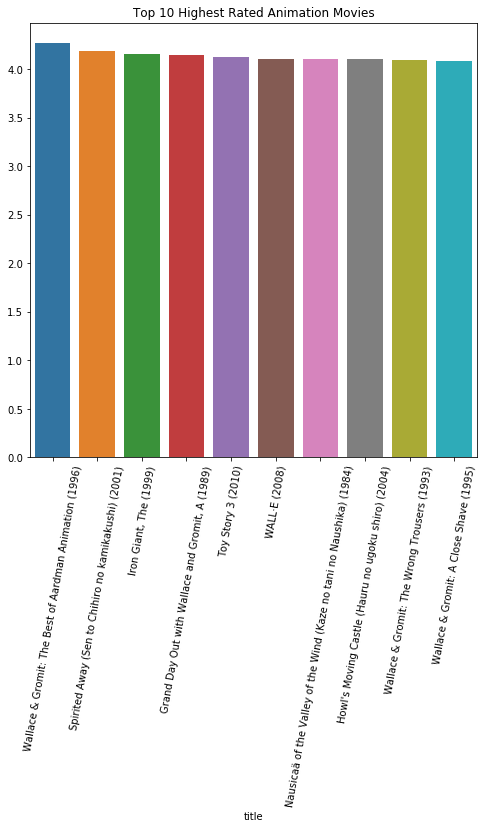

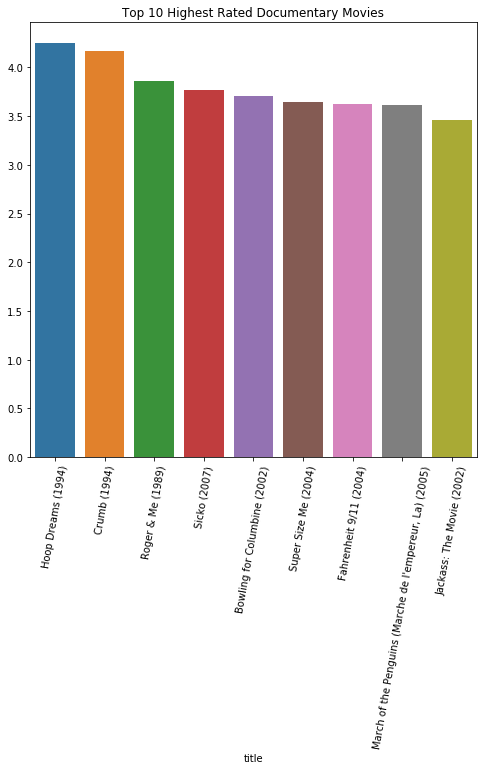

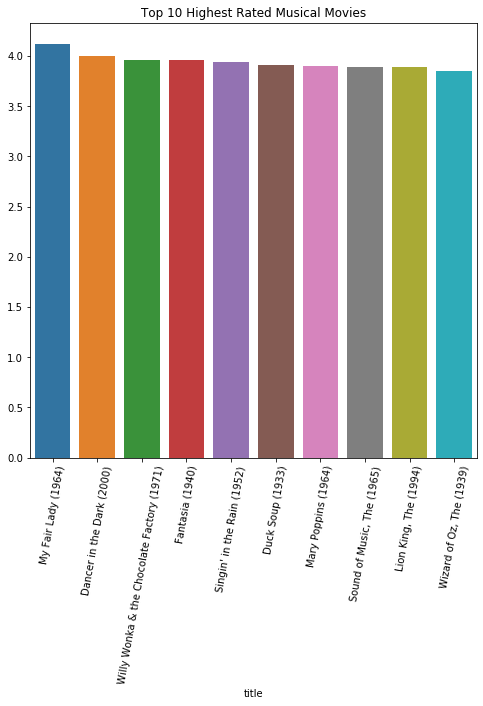

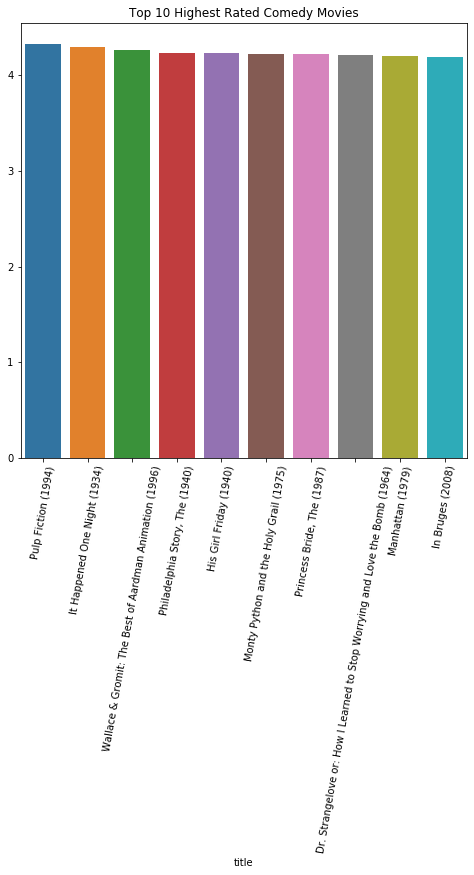

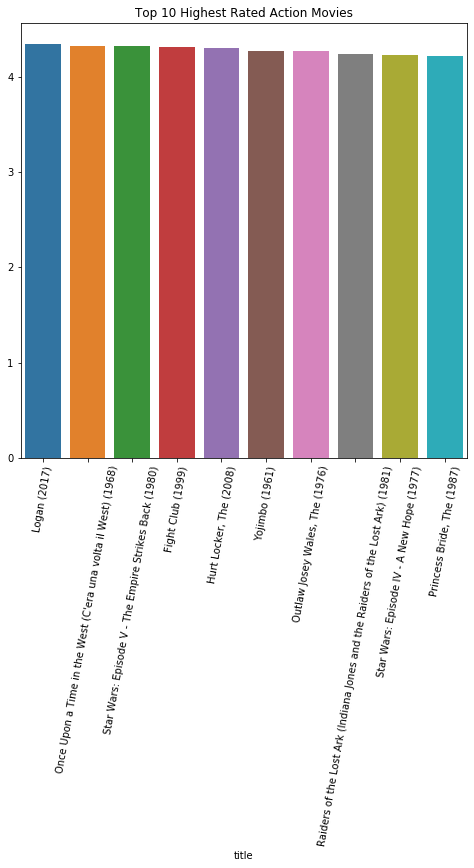

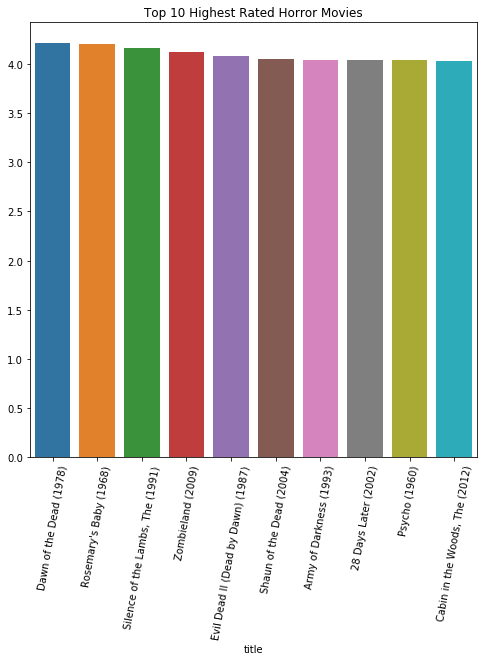

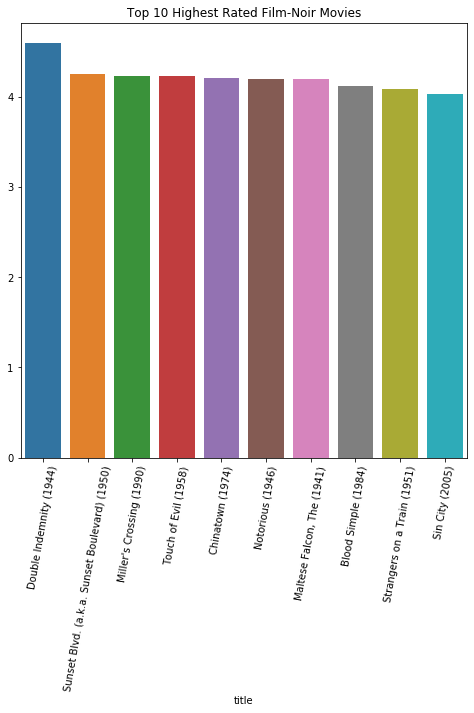

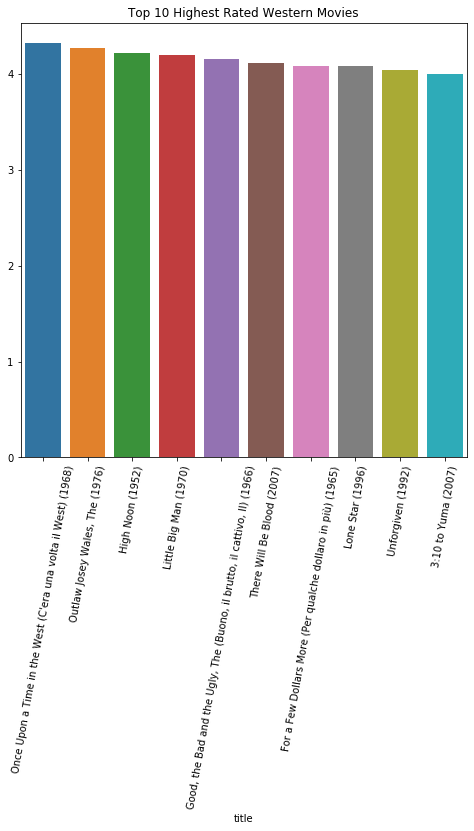

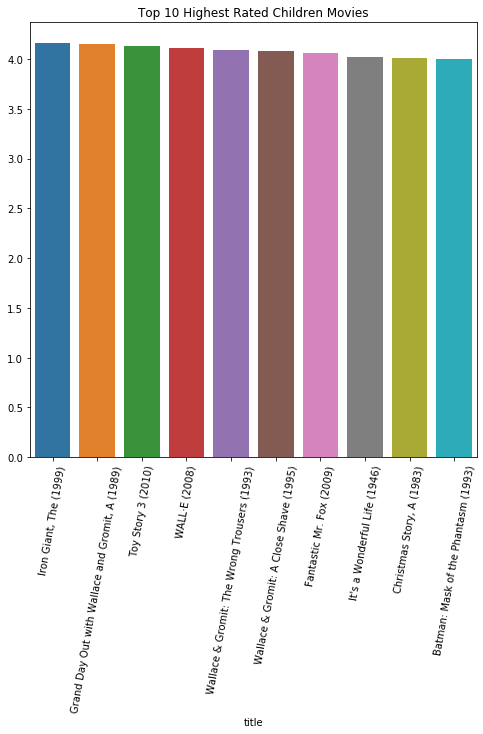

In [30]:
for gen in matrix.columns[2:]:
    x = matrix[(matrix[gen]==True)]
    plt.figure(figsize=(8,8))
    topmovies = x.groupby('title').mean()['rating'].sort_values(ascending=False).head(10)
    sns.barplot(topmovies.index, topmovies.values)
    plt.title('Top 10 Highest Rated '+gen+' Movies')
    plt.xticks(rotation=80);

In [31]:
matrix2 = df_inner.drop(['userId', 'movieId', 'rating', 'genres', 'year'], axis=1)
matrix2.head(2)

,title,estimatedrating,Crime,Fantasy,Thriller,Drama,IMAX,Adventure,War,Sci-Fi,Mystery,Romance,Animation,Documentary,Musical,Comedy,Action,Horror,Film-Noir,Western,Children
0,Toy Story (1995),4.546813,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True
1,Grumpier Old Men (1995),3.762028,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False


Looking at the 10 highest model-predicted ratings for each movie in every genre to visualize differences.

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

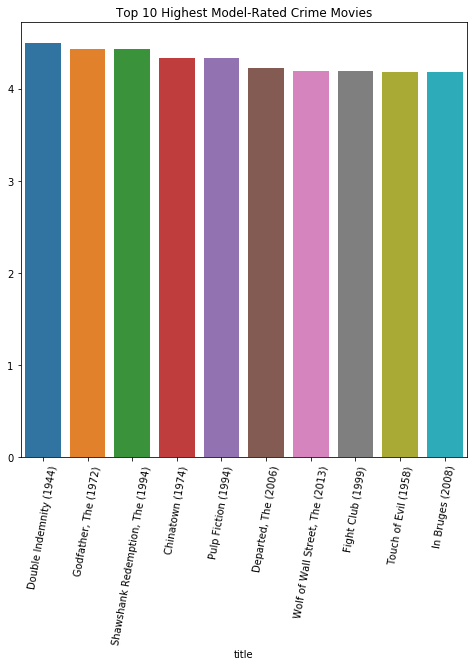

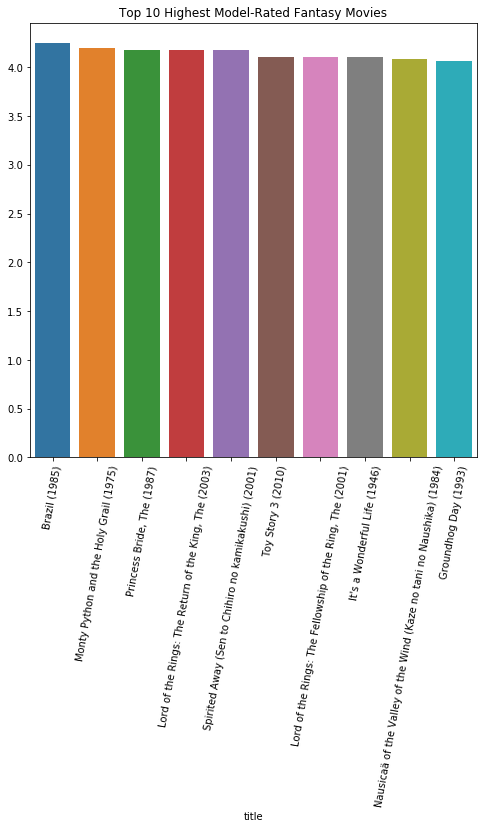

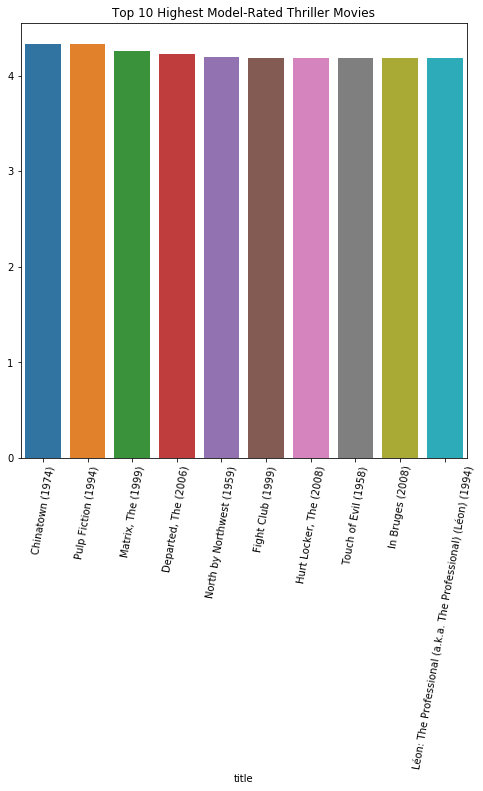

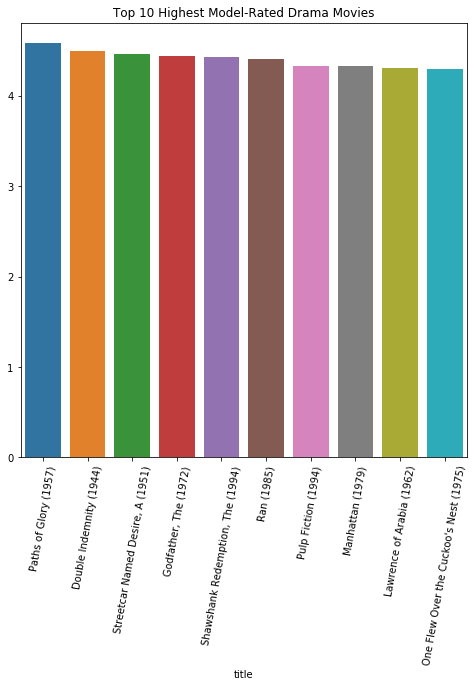

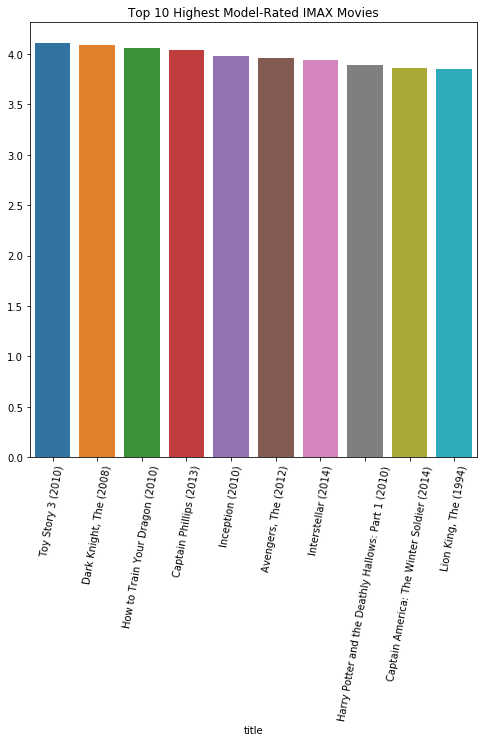

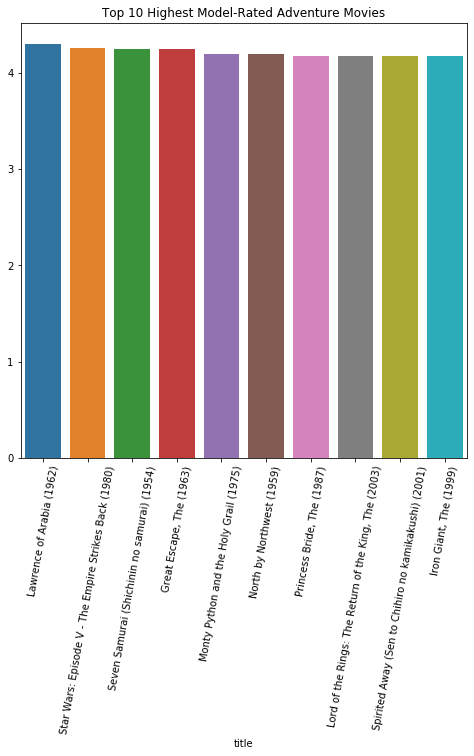

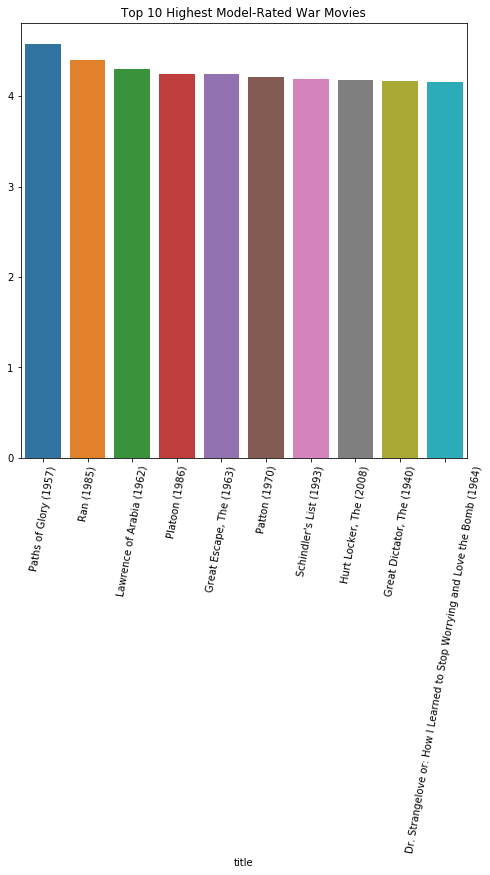

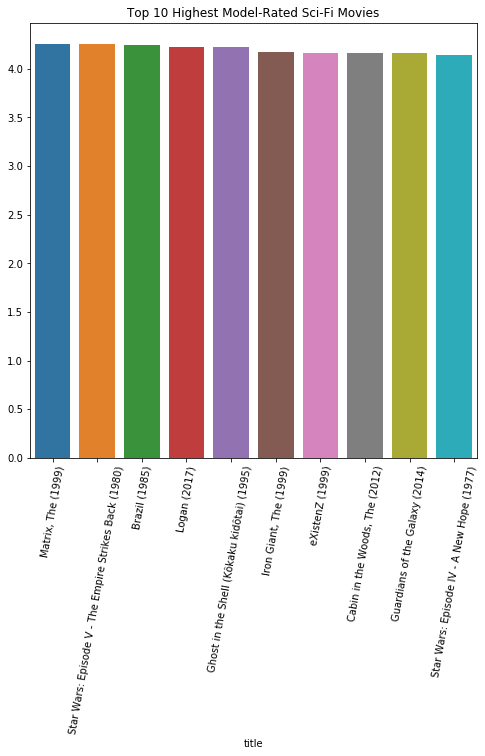

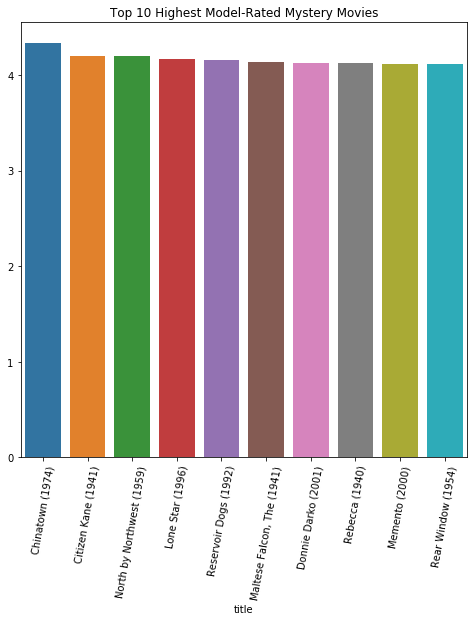

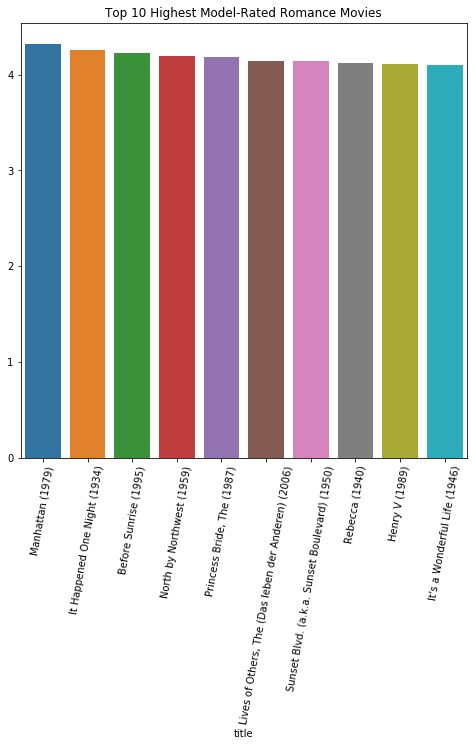

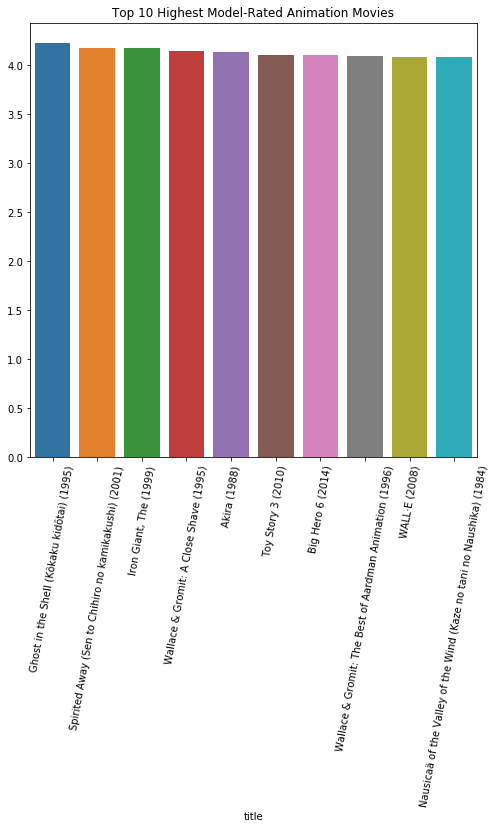

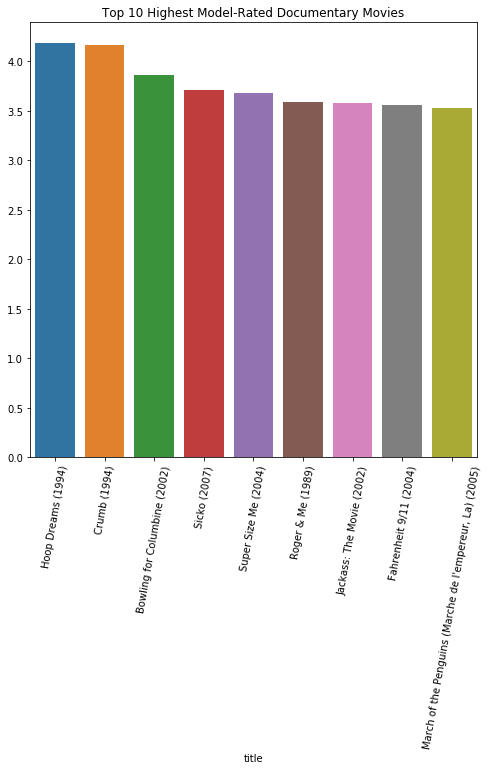

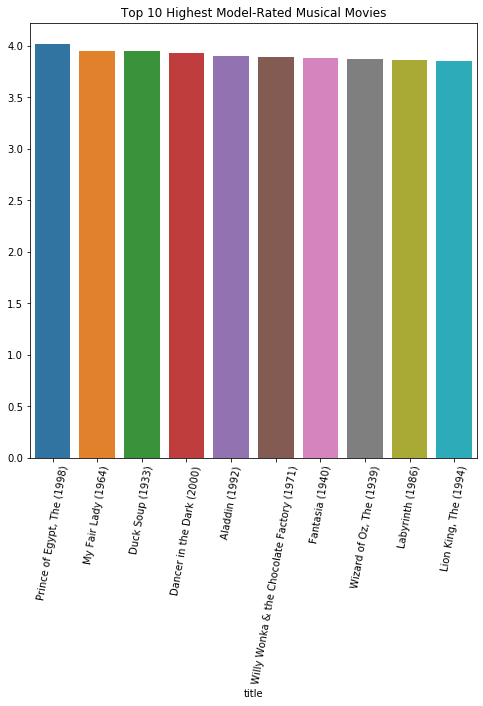

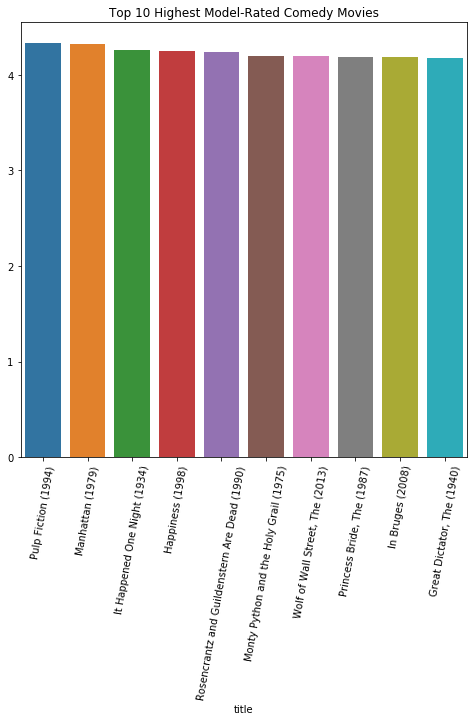

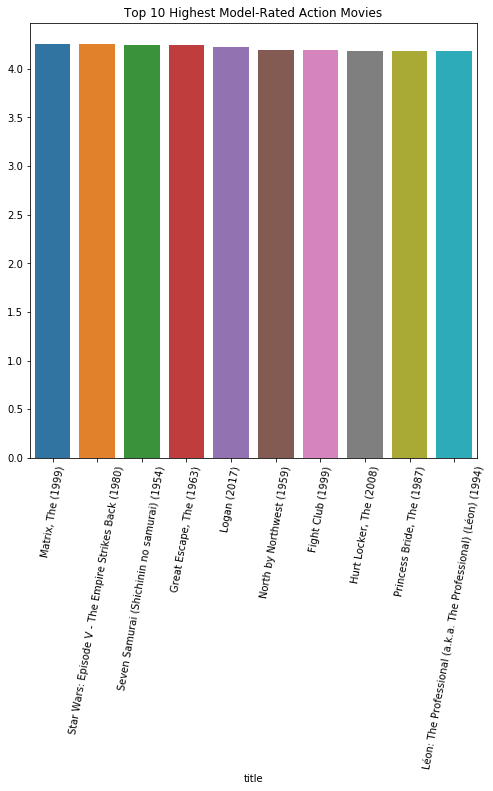

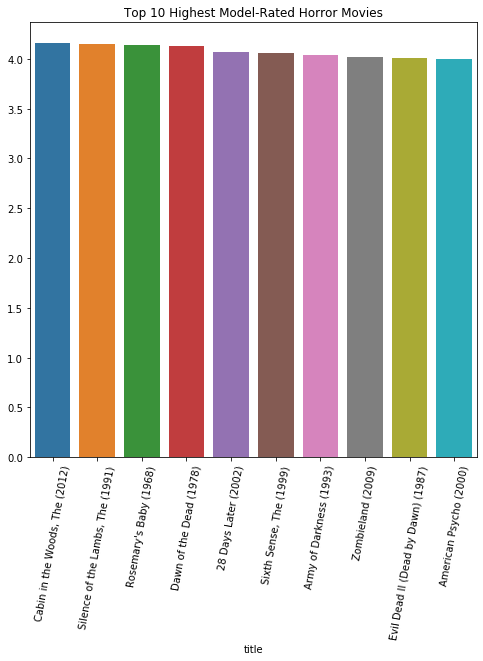

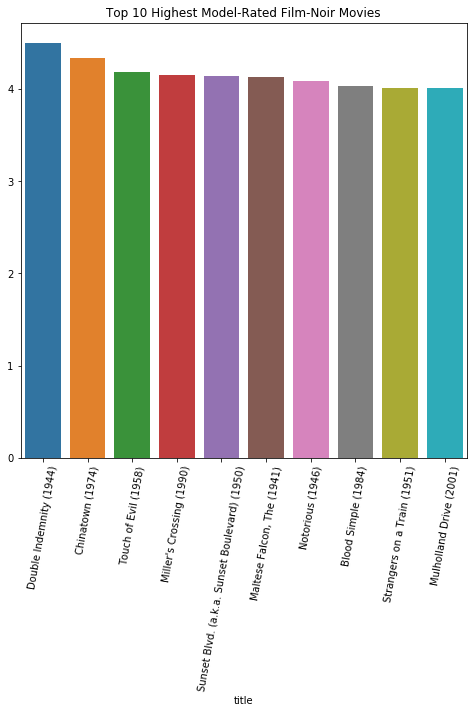

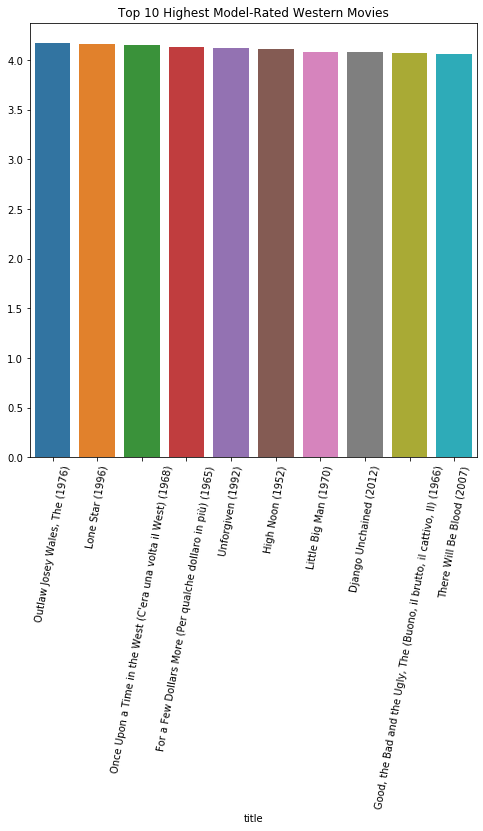

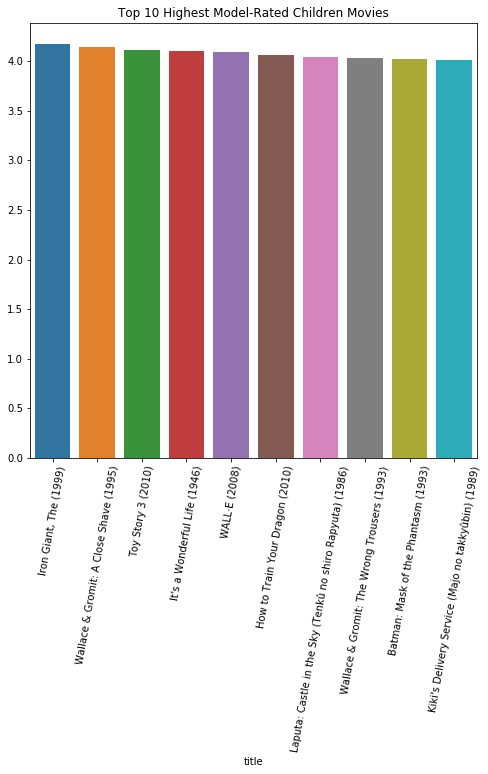

In [37]:
for gen in matrix2.columns[2:]:
    x = matrix2[(matrix2[gen]==True)]
    plt.figure(figsize=(8,8))
    topmovies = x.groupby('title').mean()['estimatedrating'].sort_values(ascending=False).head(10)
    sns.barplot(topmovies.index, topmovies.values)
    plt.title('Top 10 Highest Model-Rated '+gen+' Movies')
    plt.xticks(rotation=80);

In [34]:
matrix3 = df_inner.drop(['userId', 'movieId', 'rating', 'estimatedrating', 'genres', 'year'], axis=1)
matrix3.head(2)

,title,Crime,Fantasy,Thriller,Drama,IMAX,Adventure,War,Sci-Fi,Mystery,Romance,Animation,Documentary,Musical,Comedy,Action,Horror,Film-Noir,Western,Children
0,Toy Story (1995),False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True
1,Grumpier Old Men (1995),False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False


Compare both Top 10 Rating Graphs with Top 10 most-watched movies in each genre to check for popularity bias.

Looking at both rating graphs, we can see that popularity bias is not present in our data.

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

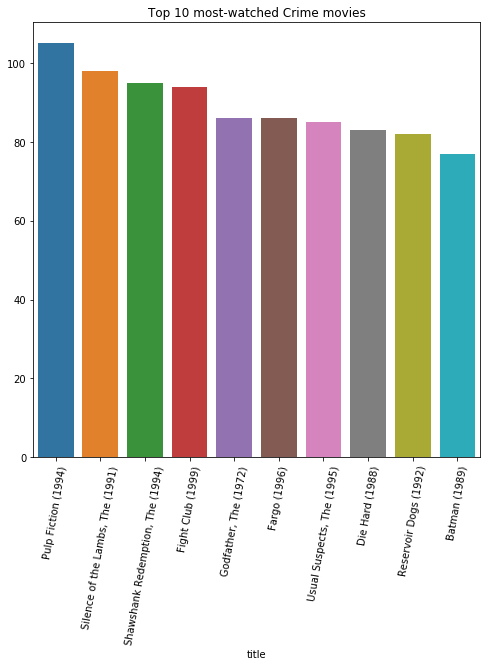

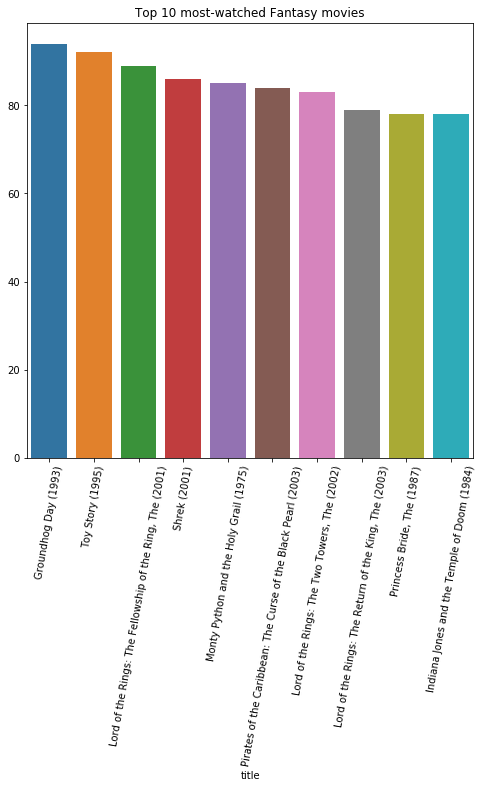

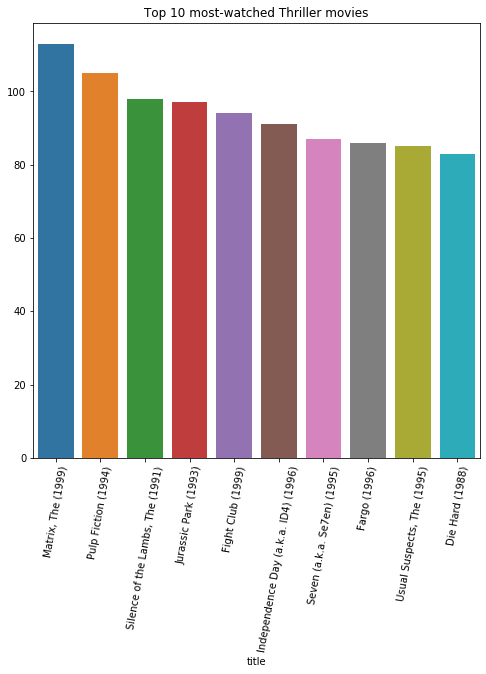

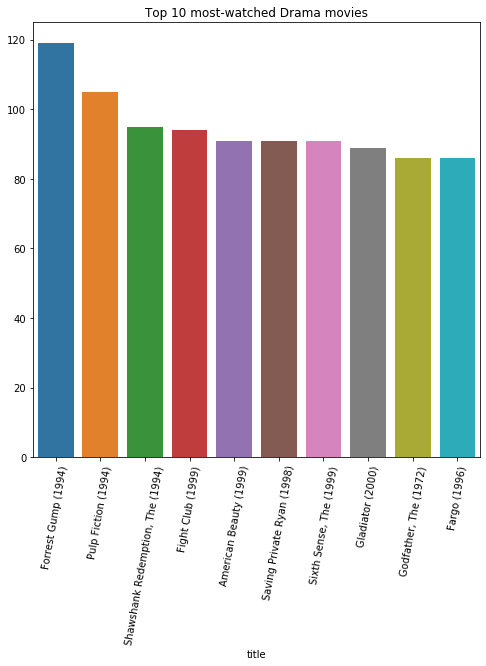

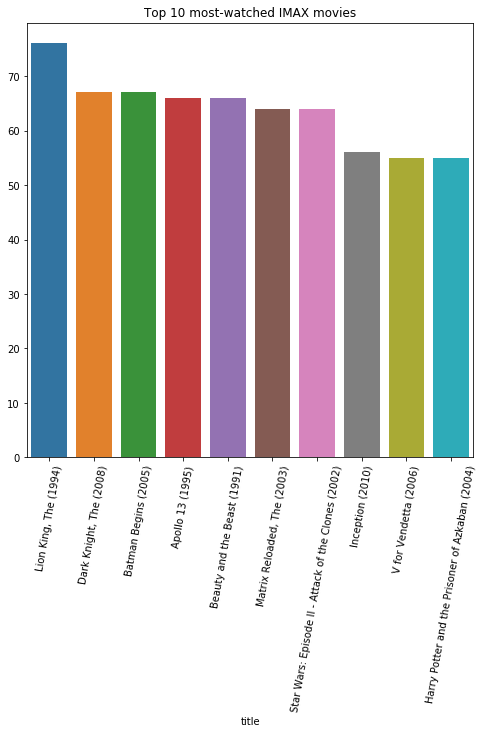

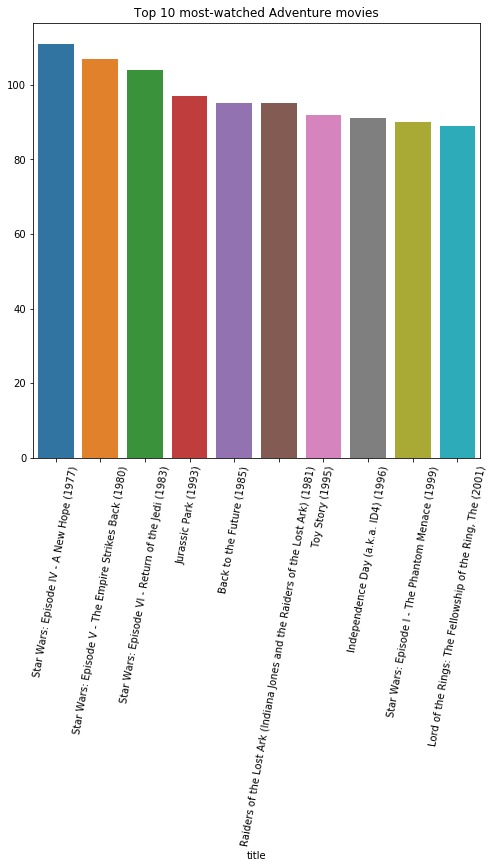

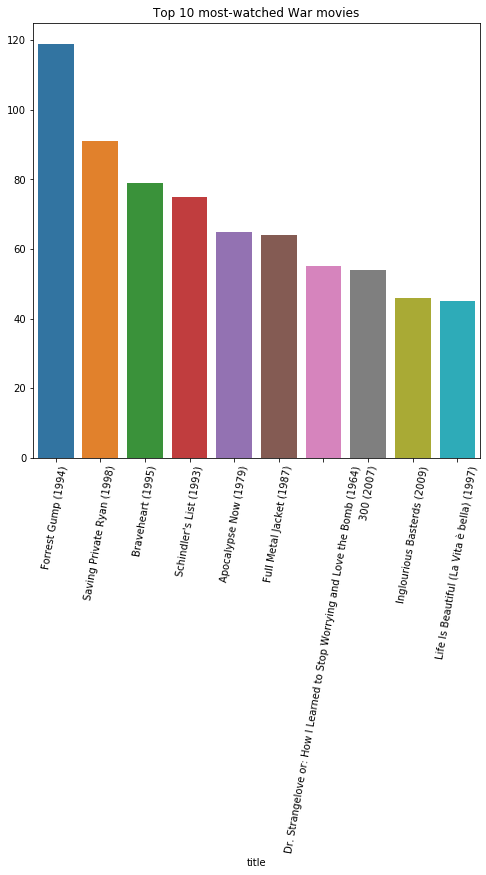

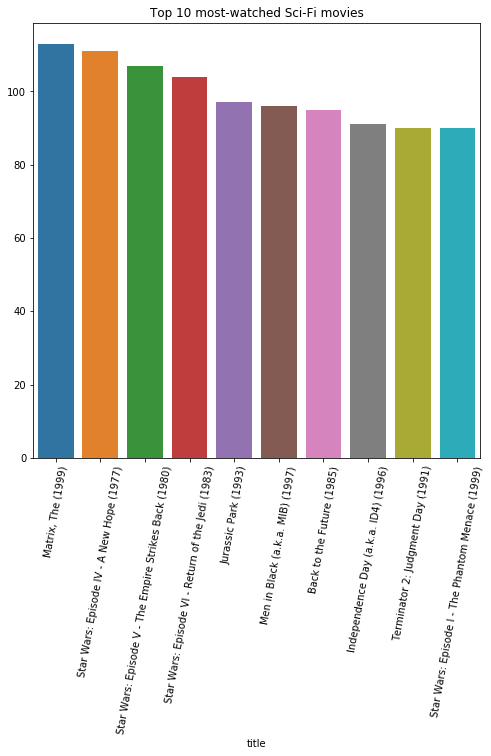

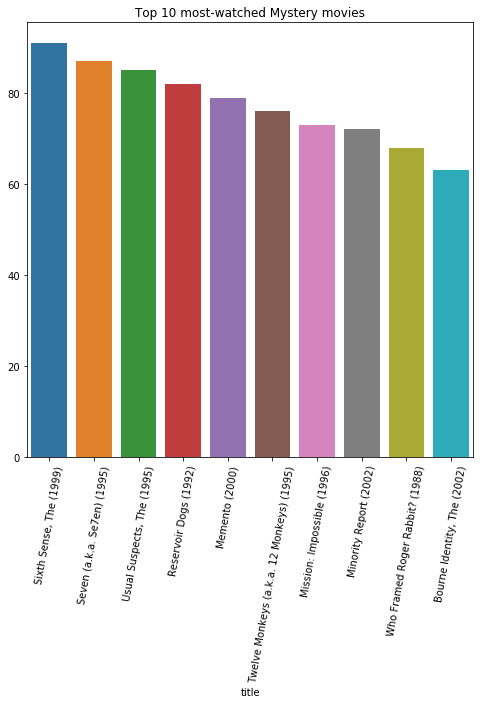

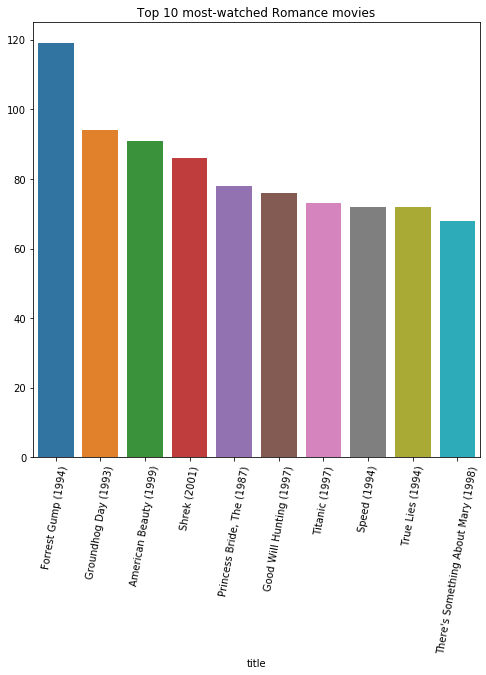

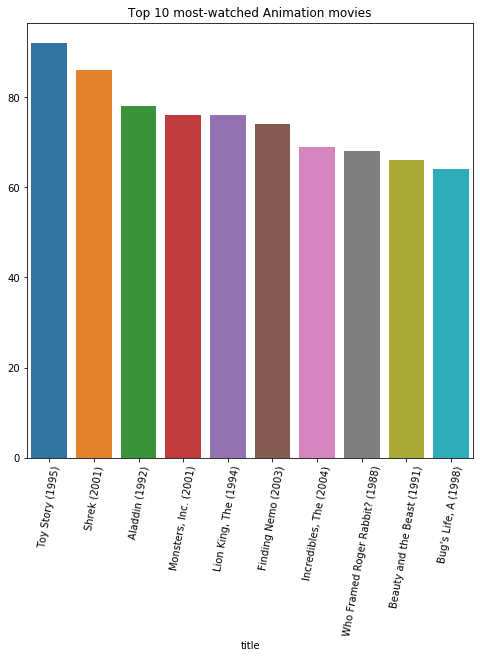

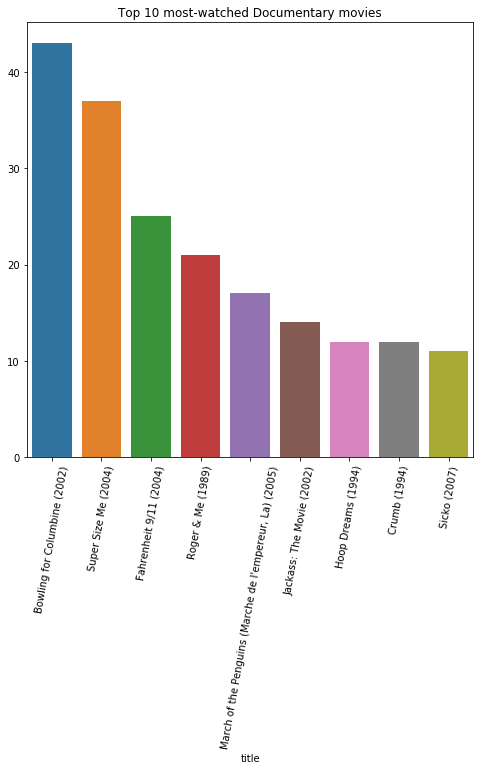

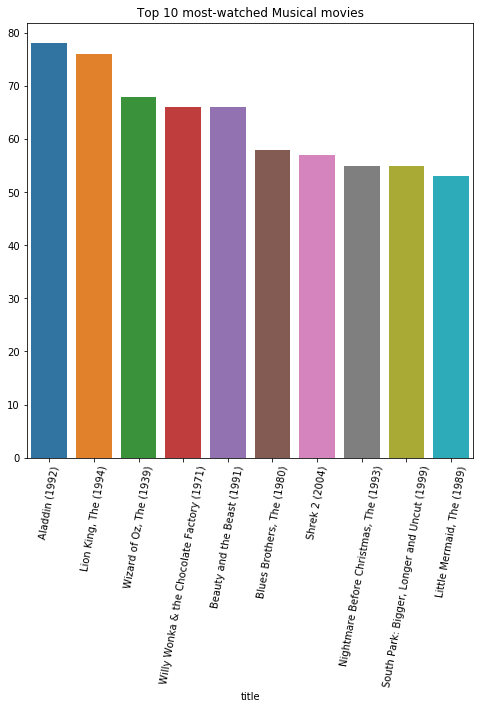

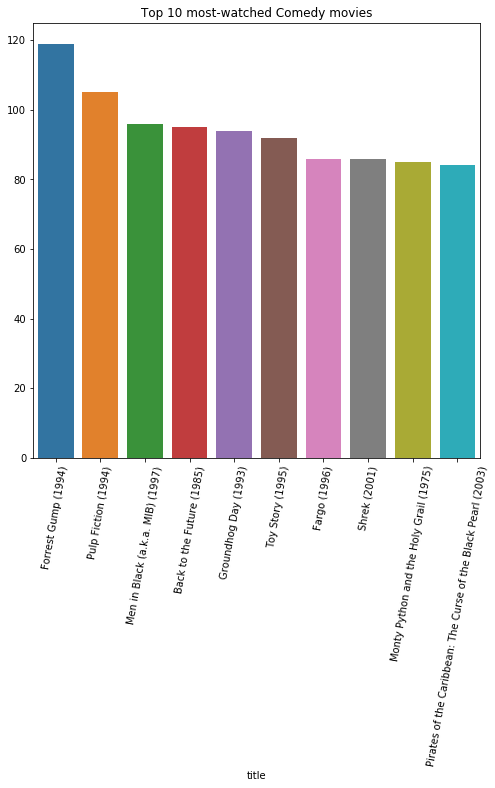

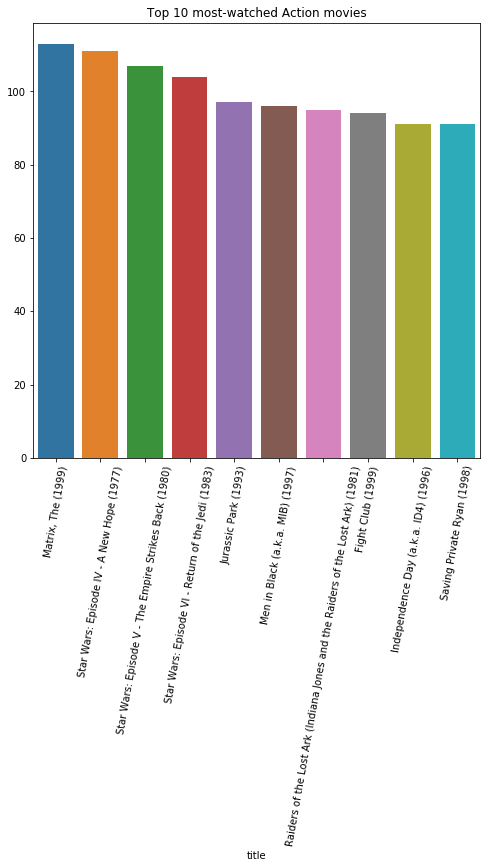

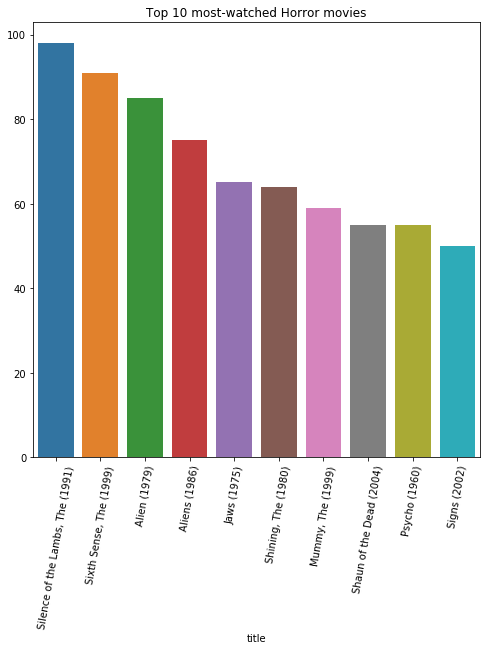

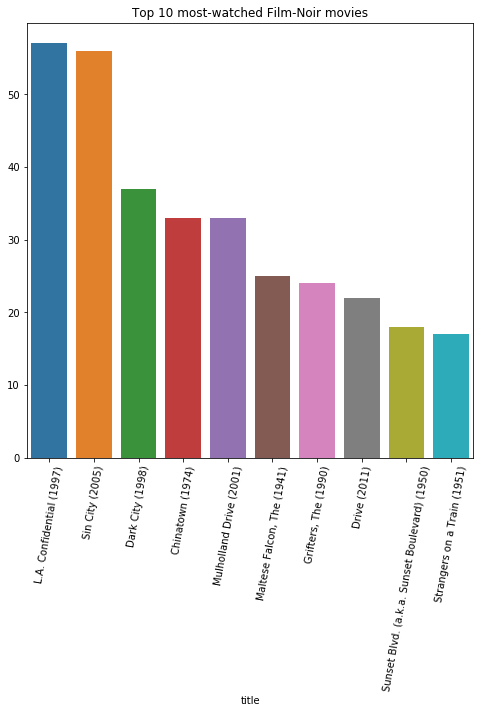

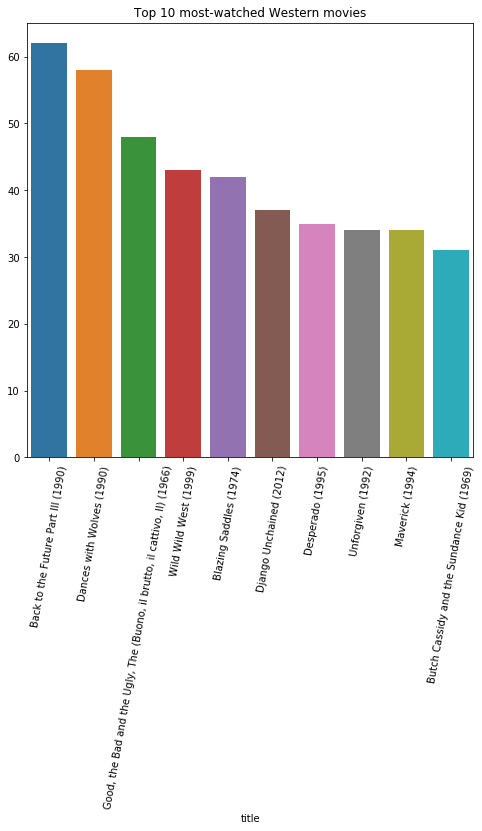

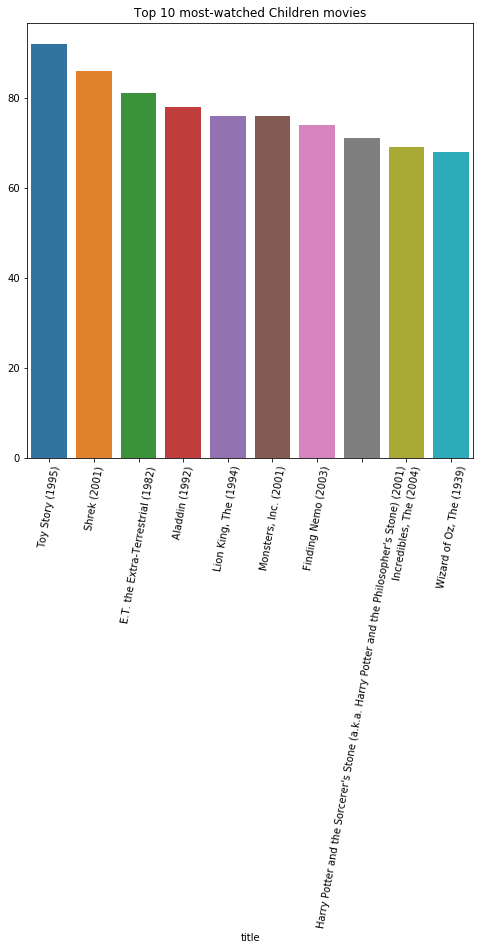

In [36]:
for gen in matrix3.columns[1:]:
    x = matrix3[(matrix3[gen]==True)]
    plt.figure(figsize=(8,8))
    topmovies = x.groupby('title').size().sort_values(ascending=False).head(10)
    sns.barplot(topmovies.index, topmovies.values)
    plt.title('Top 10 most-watched '+gen+' movies')
    plt.xticks(rotation=80);